In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

<Figure size 640x480 with 0 Axes>

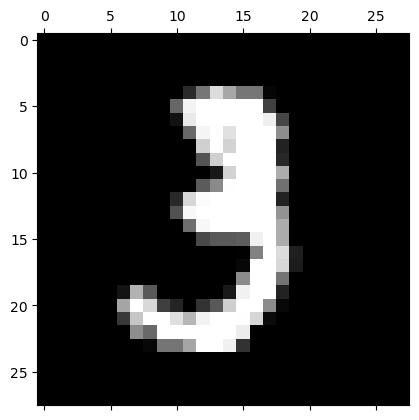

In [6]:
plt.gray()
plt.matshow(X_train[10])

In [7]:
y_train[10]

3

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
X_train=X_train/255
X_test=X_test/255


In [10]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [11]:
X_train_flattened.shape

(60000, 784)

In [12]:
X_test_flattened.shape

(10000, 784)

In [13]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [14]:
# seq:=stack of layers in my neural network
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy']

)

model.fit(X_train_flattened,y_train,epochs=5)

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8086 - loss: 0.7254
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 890us/step - accuracy: 0.9153 - loss: 0.3076
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 831us/step - accuracy: 0.9193 - loss: 0.2878
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 826us/step - accuracy: 0.9240 - loss: 0.2709
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 856us/step - accuracy: 0.9253 - loss: 0.2659


In [15]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step - accuracy: 0.9177 - loss: 0.2994


[0.26487794518470764, 0.9280999898910522]

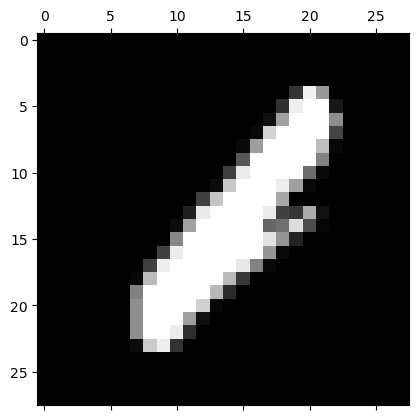

In [16]:
plt.matshow(X_test[1900])

In [17]:
y_pred=model.predict(X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step


In [18]:
y_pred[1900]

array([1.2919429e-05, 9.1785336e-01, 5.5094141e-01, 9.0336986e-03,
       6.8816215e-02, 3.8351404e-04, 2.8463185e-03, 5.8154015e-05,
       8.3086002e-01, 5.4354095e-03], dtype=float32)

In [19]:
y_pred_labels=[np.argmax(i) for i in y_pred]

In [20]:
np.argmax(y_pred[1900])

1

In [21]:
cn=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
cn

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    2,    2,    0,    5,    6,    3,    2,    1],
       [   0, 1111,    4,    1,    0,    2,    4,    2,   11,    0],
       [   3,    7,  936,   14,    8,    4,   11,    9,   37,    3],
       [   2,    0,   23,  918,    1,   26,    2,    9,   23,    6],
       [   1,    1,    3,    1,  919,    0,   11,    4,   10,   32],
       [   8,    2,    3,   29,    8,  788,   13,    5,   30,    6],
       [  11,    3,    6,    1,    7,   15,  910,    2,    3,    0],
       [   1,    5,   25,    6,    9,    1,    0,  949,    5,   27],
       [   6,    6,    7,   18,    9,   25,    8,   12,  878,    5],
       [  10,    6,    1,   11,   24,    8,    0,   25,   11,  913]])>

Text(50.722222222222214, 0.5, 'Truth')

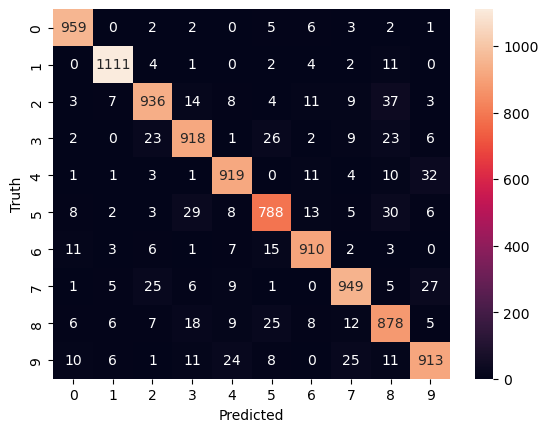

In [22]:
import seaborn as sn
sn.heatmap(cn,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [23]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
      keras.layers.Dense(10,activation='sigmoid')
    
])


model.compile(
optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy']

)

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8722 - loss: 0.4549
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9623 - loss: 0.1300
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9747 - loss: 0.0870
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9802 - loss: 0.0651
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9851 - loss: 0.0503


In [25]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - accuracy: 0.9738 - loss: 0.0800


[0.07199353724718094, 0.9769999980926514]

In [26]:
y_pred=model.predict(X_test_flattened)
y_pred_labels=[np.argmax(i) for i in y_pred]
cn=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
cn

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 970,    0,    0,    1,    1,    0,    3,    1,    4,    0],
       [   0, 1120,    2,    1,    0,    0,    4,    3,    5,    0],
       [   7,    0, 1006,    5,    1,    0,    1,    3,    9,    0],
       [   0,    0,    2,  992,    0,    1,    0,    6,    4,    5],
       [   2,    0,    0,    1,  961,    0,    4,    3,    0,   11],
       [   2,    0,    0,   13,    1,  864,    5,    1,    5,    1],
       [   3,    2,    1,    1,    5,    3,  940,    0,    3,    0],
       [   0,    1,    9,    6,    1,    0,    0,  996,    4,   11],
       [   4,    0,    4,    7,    4,    1,    2,    2,  942,    8],
       [   4,    2,    0,    5,    9,    2,    0,    5,    3,  979]])>

Text(50.722222222222214, 0.5, 'Truth')

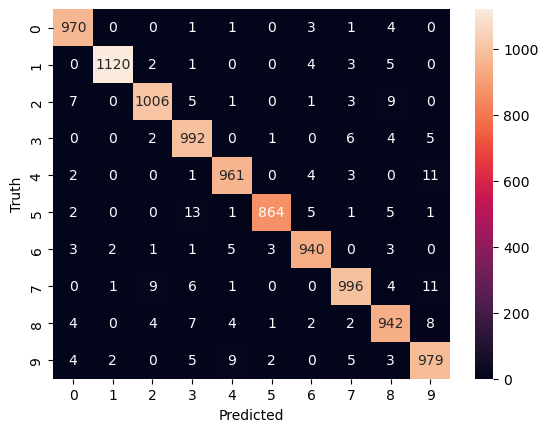

In [27]:
import seaborn as sn
sn.heatmap(cn,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [28]:
# if we do not want to flatten X_train explitcitly

In [29]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
      keras.layers.Dense(10,activation='sigmoid')
    
])

tb_callbacks=tf.keras.callbacks.TensorBoard(log_dir="logs/",histogram_freq=1)


model.compile(
optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy']

)

model.fit(X_train,y_train,epochs=5,callbacks=[tb_callbacks])

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8736 - loss: 0.4472
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9607 - loss: 0.1333
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9745 - loss: 0.0881
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9811 - loss: 0.0627
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9856 - loss: 0.0489


In [30]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9691 - loss: 0.0922


[0.08129024505615234, 0.9739000201225281]